In [15]:
import matplotlib.pyplot as plt
import torch
import torch.optim as optim

In [16]:
d = 2 # data for x

(0.017605361342430112,
 2.048728588223457,
 0.013141094148159019,
 2.0637640073895454)

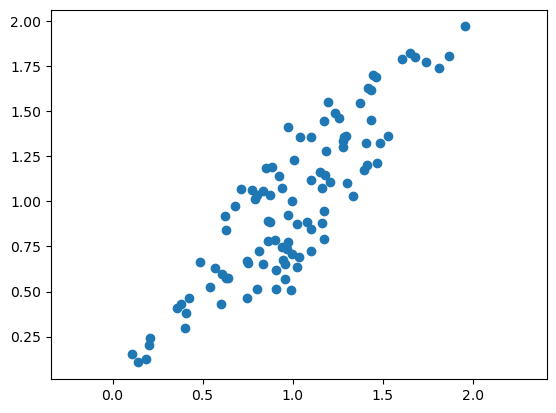

In [17]:
x = torch.rand(100, d)
x[:,0] = x[:,0] + x[:,1]
x[:,1] = 0.5*x[:,0] + x[:,1]

plt.scatter(x[:,0], x[:,1])
plt.axis('equal')

In [18]:
def init_weights():
    wEncoder = torch.randn(d, 1, requires_grad=True)
    wDecoder = torch.randn(1, d, requires_grad=True)
    bEncoder = torch.randn(1, requires_grad=True)
    bDecoder = torch.randn(1, d, requires_grad=True)
    return wEncoder, wDecoder, bEncoder, bDecoder

In [19]:
# takes 2-d inputs and produces a 1-dimensional z via a weighted sum plus a bias.
# the encoder weights will be a 1-by-2 tensor and the encoder bias will be a 1-by-1 tensor

def encoder(x, wEncoder, bEncoder):
    return x @ wEncoder + bEncoder

In [20]:
# does the reverse of the encoder, takes 1-dim z and 
# produces a 2-dim output via a weighting of a z plus bias

def decoder(z, wDecoder, bDecoder):
    return z @ wDecoder + bDecoder

In [21]:
# should be the mean squared error between x and its reconstruction, 
# averaged over the data set

def loss_fn(x, x_reconstructed):
    return torch.mean((x - x_reconstructed) ** 2)

In [22]:
# runner for the optimizer, encode, decode, and loss function

def runner(optimizer, wEncoder, bEncoder, wDecoder, bDecoder, steps=1000):
    loss_per_step = []
    
    for step in range(steps):
        z = encoder(x, wEncoder, bEncoder)  #encode 
        reconstructed = decoder(z, wDecoder, bDecoder)  #decode 
        loss = loss_fn(x, reconstructed)  #loss
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        loss_per_step.append(loss.item())
        
        if step % 50 == 0:
            print(f"Step {step}, Loss: {loss.item():.4f}")
            
    return loss_per_step, reconstructed

In [23]:
wEncoder, wDecoder, bEncoder, bDecoder = init_weights() #initalize weights for the optimizer
sgd_one_optimizer = optim.SGD([wEncoder, wDecoder, bEncoder, bDecoder], lr=0.01) #initalize optimizer
loss_one, sgd_one_x_reconstructed = runner(sgd_one_optimizer, wEncoder, bEncoder, wDecoder, bDecoder) #run model

Step 0, Loss: 2.7515
Step 50, Loss: 0.0953
Step 100, Loss: 0.0813
Step 150, Loss: 0.0735
Step 200, Loss: 0.0674
Step 250, Loss: 0.0623
Step 300, Loss: 0.0581
Step 350, Loss: 0.0545
Step 400, Loss: 0.0513
Step 450, Loss: 0.0486
Step 500, Loss: 0.0461
Step 550, Loss: 0.0439
Step 600, Loss: 0.0418
Step 650, Loss: 0.0400
Step 700, Loss: 0.0383
Step 750, Loss: 0.0367
Step 800, Loss: 0.0352
Step 850, Loss: 0.0338
Step 900, Loss: 0.0326
Step 950, Loss: 0.0314


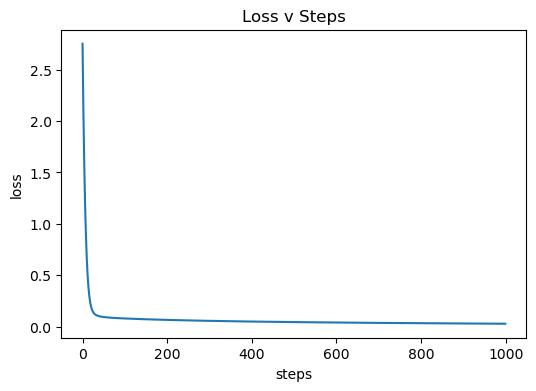

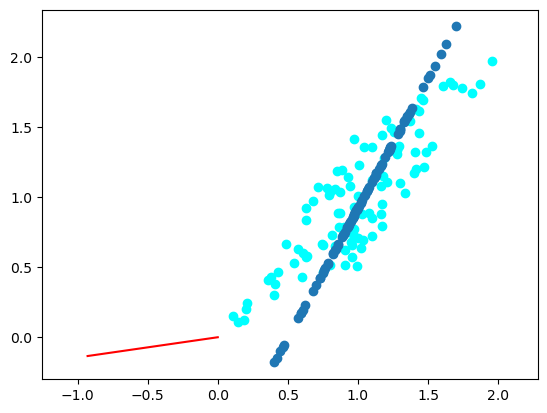

Weight Ratio:  tensor([[1.4032],
        [0.1095]], grad_fn=<DivBackward0>)


In [24]:
# plot losses per steps

plt.figure(figsize=(6,4))
plt.plot(loss_one, label="Loss")
plt.xlabel('steps')
plt.ylabel('loss')
plt.title('Loss v Steps')
plt.show()
    
# plot the original data and the reconstructed data
plt.scatter(x[:,0],x[:,1],color='cyan')
plt.scatter(sgd_one_x_reconstructed.detach()[:,0],sgd_one_x_reconstructed.detach()[:,1])
plt.plot([0,wEncoder[0,0].item()], [0,wEncoder[1,0].item()], '-r')
plt.axis('equal')
plt.show()

weight_ratio = wEncoder / wDecoder.T
print("Weight Ratio: ", weight_ratio)

The training process using Stochastic Gradient Descent (SGD) without momentum shows a significant reduction in loss over 1000 steps, as observed in the loss curve. Initially, at step 0, the loss starts at a high value of 2.7515, indicating that the model’s initial reconstruction of the input data is far from the original. However, as training progresses, the loss decreases sharply within the first few hundred steps. By step 100, the loss has dropped to 0.0813, and by step 900, it further decreases to 0.0314. This demonstrates that the model is successfully learning to reconstruct the input data more accurately with each iteration, with a rapid initial improvement followed by gradual fine-tuning. The second plot visually confirms the results. The original data points, shown in cyan, are scattered along a clear pattern. The reconstructed data points (in a different color) follows the original points, suggesting that the autoencoder has learned an effective representation of the data through the 1D bottleneck. The red line indicates the vector formed by the learned encode weights, which captures the dominant direction of variance in the data, further supporting the model’s success in dimensionality reduction and reconstruction.

In [25]:
wEncoder, wDecoder, bEncoder, bDecoder = init_weights() #initalize weights for the optimizer
sgd_two_optimizer = optim.SGD([wEncoder, wDecoder, bEncoder, bDecoder], lr=0.01, momentum=0.9) #initalize optimizer
loss_two, sgd_two_x_reconstructed = runner(sgd_two_optimizer, wEncoder, bEncoder, wDecoder, bDecoder) #run model

Step 0, Loss: 6.2819
Step 50, Loss: 0.0573
Step 100, Loss: 0.0209
Step 150, Loss: 0.0139
Step 200, Loss: 0.0116
Step 250, Loss: 0.0108
Step 300, Loss: 0.0106
Step 350, Loss: 0.0105
Step 400, Loss: 0.0105
Step 450, Loss: 0.0104
Step 500, Loss: 0.0104
Step 550, Loss: 0.0104
Step 600, Loss: 0.0104
Step 650, Loss: 0.0104
Step 700, Loss: 0.0104
Step 750, Loss: 0.0104
Step 800, Loss: 0.0104
Step 850, Loss: 0.0104
Step 900, Loss: 0.0104
Step 950, Loss: 0.0104


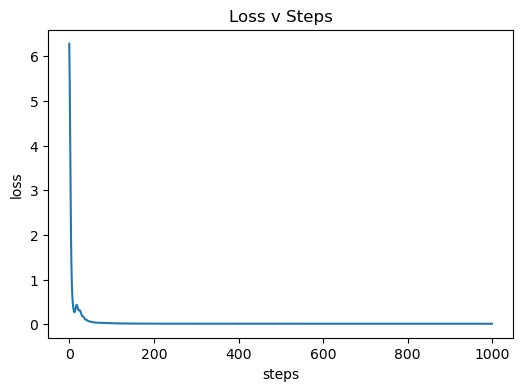

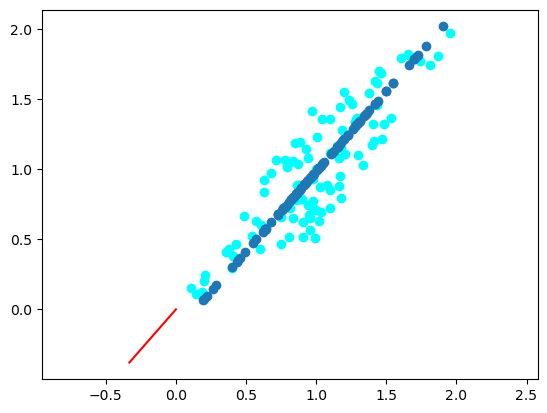

Weight Ratio:  tensor([[0.2539],
        [0.2538]], grad_fn=<DivBackward0>)


In [26]:
# plot losses per steps

plt.figure(figsize=(6,4))
plt.plot(loss_two, label="Loss")
plt.xlabel('steps')
plt.ylabel('loss')
plt.title('Loss v Steps')
plt.show()

# plot the original data and the reconstructed data   
plt.scatter(x[:,0],x[:,1],color='cyan')
plt.scatter(sgd_two_x_reconstructed.detach()[:,0],sgd_two_x_reconstructed.detach()[:,1])
plt.plot([0,wEncoder[0,0].item()], [0,wEncoder[1,0].item()], '-r')
plt.axis('equal')
plt.show()

weight_ratio = wEncoder / wDecoder.T
print("Weight Ratio: ", weight_ratio)

When introducing momentum to the Stochastic Gradient Descent (SGD) optimizer with a learning rate of 0.01 and momentum set of 0.9, the autoencoder achieves a slightly faster convergence, as evidenced by the decreasing loss. Starting with an initial loss of 6.2819, the model quickly reduces the loss to 0.0108 by step 250, after which the loss stabilizes, indicating that the model has converged to a stable solution. Momentum helps the optimizer maintain its progress in the same direction, overcoming any small gradient fluctuations, which leads to smoother convergence. In the second plot, the reconstructed data points (shown in a different color) align more closely with the original data points (cyan), compared to the previous experiment without momentum. The red line indicating the learned encoder weights are more precise, showing that the model has captured the primary direction of variance in the data more effectively. This improvement in reconstruction quality suggests that adding momentum allows the model to avoid getting stuck in local minima and helps it find a more optimal solution (step 900: without momentum 0.0314 and with momentum 0.0104).

In [27]:
wEncoder, wDecoder, bEncoder, bDecoder = init_weights() #initalize weights for the optimizer
rms_one_optimizer = optim.RMSprop([wEncoder, wDecoder, bEncoder, bDecoder], lr=0.01, momentum=0.9) #initalize optimizer
loss_three, rms_one_x_reconstructed = runner(rms_one_optimizer, wEncoder, bEncoder, wDecoder, bDecoder) #run model

Step 0, Loss: 2.5304
Step 50, Loss: 0.0879
Step 100, Loss: 0.0121
Step 150, Loss: 0.0105
Step 200, Loss: 0.0105
Step 250, Loss: 0.0104
Step 300, Loss: 0.0104
Step 350, Loss: 0.0104
Step 400, Loss: 0.0104
Step 450, Loss: 0.0105
Step 500, Loss: 0.0105
Step 550, Loss: 0.0111
Step 600, Loss: 0.0105
Step 650, Loss: 0.0105
Step 700, Loss: 0.0106
Step 750, Loss: 0.0104
Step 800, Loss: 0.0106
Step 850, Loss: 0.0113
Step 900, Loss: 0.0105
Step 950, Loss: 0.0105


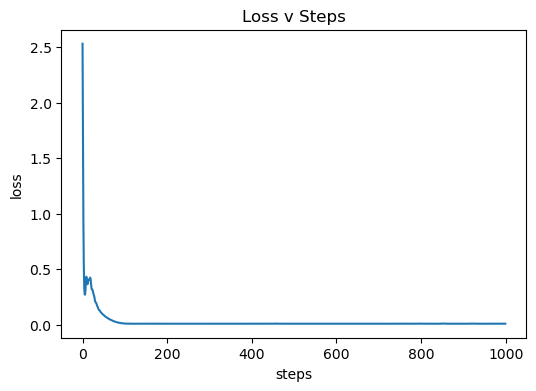

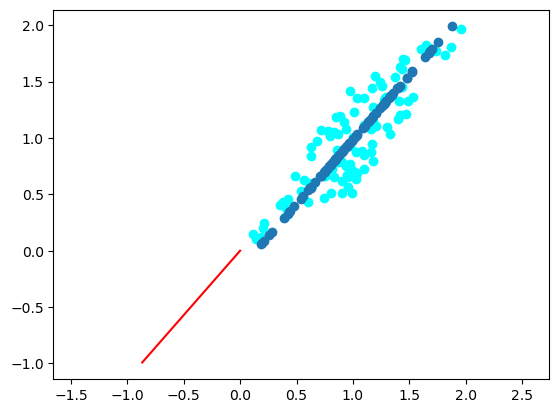

Weight Ratio:  tensor([[1.7193],
        [1.7207]], grad_fn=<DivBackward0>)


In [28]:
# plot losses per steps

plt.figure(figsize=(6,4))
plt.plot(loss_three, label="Loss")
plt.xlabel('steps')
plt.ylabel('loss')
plt.title('Loss v Steps')
plt.show()

# plot the original data and the reconstructed data   
plt.scatter(x[:,0],x[:,1],color='cyan')
plt.scatter(rms_one_x_reconstructed.detach()[:,0],rms_one_x_reconstructed.detach()[:,1])
plt.plot([0,wEncoder[0,0].item()], [0,wEncoder[1,0].item()], '-r')
plt.axis('equal')
plt.show()

weight_ratio = wEncoder / wDecoder.T
print("Weight Ratio: ", weight_ratio)

When using RMSprop with momentum set to 0.9, the loss shows some oscillations, particularly after the initial steps. The initial loss is 2.5304 and quickly strengthens after 150 steps -> 0.0105.  We can notice based on the steps that it converges faster than the other models. Oscillations occur periodically, likely due to the adaptive learning rate nature of RMSprop, which adjusts the learning rate based on recent gradient magnitudes, leading to overshooting. In the second plot, the reconstructed data points again align closely with the original data points, similar to the results from SGD with momentum. However, the oscillations in the loss curve suggest that while RMSprop may perform comparably in terms of final reconstruction, its optimization process is less stable in this case. The red line representing the learned encoder weights is accurately aligned with the dominant data direction, indicating that despite the fluctuations in loss, the model effectively learns to represent the data through the bottleneck.